In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [20]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()


In [21]:
len(X_train)

60000

In [22]:
len(X_test)

10000

In [23]:
X_train[0].shape

(28, 28)

In [24]:
X_train[0].shape

(28, 28)

In [25]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

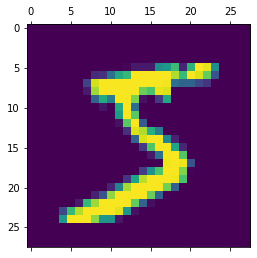

In [26]:
plt.matshow(X_train[0])

In [27]:
y_train[0]

5

In [28]:
X_train = X_train / 255
X_test = X_test / 255

In [34]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_train.shape

(60000, 28, 28, 1)

In [35]:
X_test = X_test.reshape(-1, 28, 28, 1)
X_test.shape

(10000, 28, 28, 1)

In [36]:
from tensorflow.keras import datasets, layers, models
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [37]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.1513 - accuracy: 0.9542
Epoch 2/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0508 - accuracy: 0.9845
Epoch 3/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0363 - accuracy: 0.9890
Epoch 4/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0258 - accuracy: 0.9917
Epoch 5/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0213 - accuracy: 0.9934
Epoch 6/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0162 - accuracy: 0.9948
Epoch 7/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0118 - accuracy: 0.9960
Epoch 8/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0100 - accuracy: 0.9968
Epoch 9/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0088 - accuracy: 0.9972
Epoch 10/10
1875/1875 [==============================] - 23s 12m

In [40]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0371 - accuracy: 0.9903


[0.03705498203635216, 0.9902999997138977]

In [11]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [12]:
X_train_flattened.shape

(60000, 784)

In [21]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 679us/step - loss: 0.4884 - accuracy: 0.8775
Epoch 2/5
1875/1875 [==============================] - 1s 665us/step - loss: 0.3060 - accuracy: 0.91580s - loss: 0.3063 - accuracy: 0.
Epoch 3/5
1875/1875 [==============================] - 1s 684us/step - loss: 0.2855 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 1s 660us/step - loss: 0.2749 - accuracy: 0.9232
Epoch 5/5
1875/1875 [==============================] - 1s 686us/step - loss: 0.2679 - accuracy: 0.9265


In [22]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 417us/step - loss: 0.2642 - accuracy: 0.9282


[0.2641924023628235, 0.9282000064849854]

In [23]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([1.62488450e-05, 8.62714067e-11, 3.91028261e-05, 8.16342235e-03,
       8.00331748e-07, 1.09176755e-04, 1.48616852e-09, 7.75039673e-01,
       7.62082855e-05, 7.57664442e-04], dtype=float32)

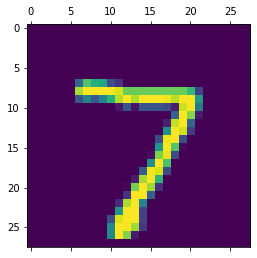

In [24]:
plt.matshow(X_test[0])

In [25]:
np.argmax(y_predicted[0])

7

In [26]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [27]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [28]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 956,    0,    0,    2,    0,    5,   12,    2,    3,    0],
       [   0, 1105,    4,    2,    0,    1,    4,    2,   17,    0],
       [   3,    7,  930,   14,    7,    5,   13,   10,   39,    4],
       [   1,    0,   20,  913,    0,   28,    3,   14,   27,    4],
       [   1,    1,    3,    1,  910,    0,   14,    4,    9,   39],
       [   7,    1,    2,   24,    7,  794,   17,    4,   30,    6],
       [   6,    3,    6,    1,    7,   11,  920,    2,    2,    0],
       [   1,    5,   24,    4,    6,    1,    0,  957,    3,   27],
       [   4,    6,    7,   18,    9,   23,   10,   10,  881,    6],
       [   8,    7,    2,    9,   20,    7,    0,   27,   13,  916]])>

Text(69.0, 0.5, 'Truth')

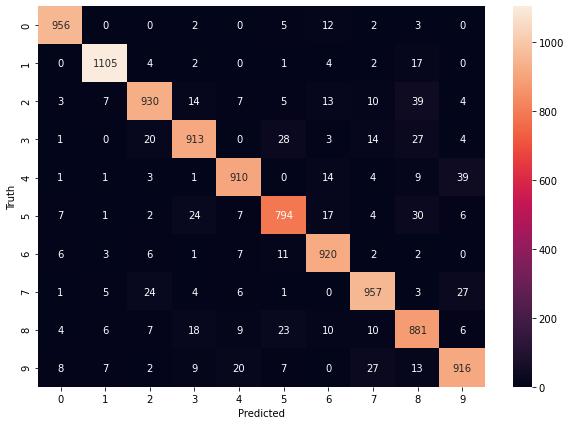

In [29]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [30]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 930us/step - loss: 0.2981 - accuracy: 0.9164
Epoch 2/5
1875/1875 [==============================] - 2s 871us/step - loss: 0.1386 - accuracy: 0.9595
Epoch 3/5
1875/1875 [==============================] - 2s 835us/step - loss: 0.0980 - accuracy: 0.9707
Epoch 4/5
1875/1875 [==============================] - 2s 914us/step - loss: 0.0752 - accuracy: 0.9775
Epoch 5/5
1875/1875 [==============================] - 2s 916us/step - loss: 0.0604 - accuracy: 0.9814


In [31]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 613us/step - loss: 0.0851 - accuracy: 0.9748


[0.08513443171977997, 0.9747999906539917]

Text(69.0, 0.5, 'Truth')

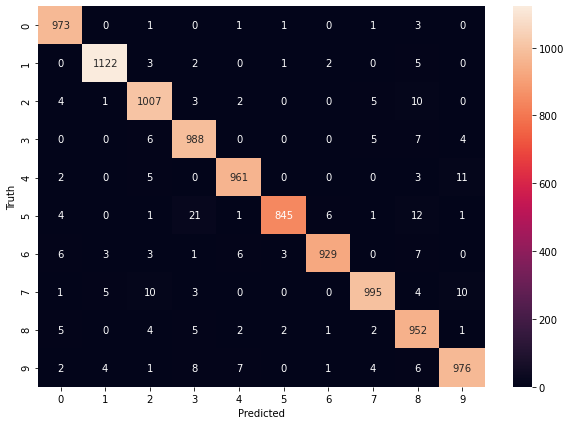

In [32]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [33]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 904us/step - loss: 0.2992 - accuracy: 0.9162
Epoch 2/10
1875/1875 [==============================] - 2s 826us/step - loss: 0.1415 - accuracy: 0.9588
Epoch 3/10
1875/1875 [==============================] - 2s 862us/step - loss: 0.1014 - accuracy: 0.9699
Epoch 4/10
1875/1875 [==============================] - 2s 899us/step - loss: 0.0785 - accuracy: 0.9765
Epoch 5/10
1875/1875 [==============================] - 2s 863us/step - loss: 0.0642 - accuracy: 0.9807
Epoch 6/10
1875/1875 [==============================] - 2s 803us/step - loss: 0.0532 - accuracy: 0.9843
Epoch 7/10
1875/1875 [==============================] - 1s 800us/step - loss: 0.0448 - accuracy: 0.9861
Epoch 8/10
1875/1875 [==============================] - 2s 806us/step - loss: 0.0372 - accuracy: 0.9882
Epoch 9/10
1875/1875 [==============================] - 2s 804us/step - loss: 0.0327 - accuracy: 0.9897
Epoch 10/10
1875/1875 [==============================] - 2s 835u

In [34]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 740us/step - loss: 0.0812 - accuracy: 0.9783


[0.08122821897268295, 0.9782999753952026]